## 导包

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.family']  =  'SimHei'  #字体选择
import warnings
warnings.filterwarnings('ignore')  #忽略警告
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False #用来正常显示负号

## 数据读入

In [2]:
data_train = pd.read_csv('../数据/train.csv',encoding = 'GBK') #训练集数据
data_test = pd.read_csv('../数据/test.csv',encoding = 'GBK')   #测试集数据

## 数据预处理

### 训练集数据情况

In [3]:
#查看整体样本数据
data_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data_train.shape #样本数据形状

(10886, 12)

In [5]:
data_train.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
data_train.isnull().sum()  #缺失值统计

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
data_train.duplicated().sum() #重复值统计

0

In [8]:
data_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


查看样本数据的整体描述发现，很多字段存在最小值为0的情况。比如holiday、workingday、humidity最小值都为0，但是根据现实中的情况考虑，这些属于正常情况，所以我们在这不做处理。

### 测试集数据情况

In [9]:
data_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2012-12-20 0:00,4,0,1,1,13.12,16.665,61,8.9981
1,2012-12-20 1:00,4,0,1,1,13.12,17.425,66,0.0000
2,2012-12-20 2:00,4,0,1,1,13.12,17.425,66,0.0000
3,2012-12-20 3:00,4,0,1,2,12.30,15.910,70,6.0032
4,2012-12-20 4:00,4,0,1,2,12.30,15.910,70,6.0032


In [10]:
data_test.shape #测试集数据现状

(286, 9)

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    286 non-null    object 
 1   season      286 non-null    int64  
 2   holiday     286 non-null    int64  
 3   workingday  286 non-null    int64  
 4   weather     286 non-null    int64  
 5   temp        286 non-null    float64
 6   atemp       286 non-null    float64
 7   humidity    286 non-null    int64  
 8   windspeed   286 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 20.2+ KB


In [12]:
data_test.isnull().sum() #缺失值统计

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [13]:
data_test.duplicated().sum()  #无重复值

0

### 特征提取

#### 训试集数据处理

In [14]:
#将datetime字段细分为年、月、日、小时等新字段
data_train['datetime'] = pd.to_datetime(data_train['datetime']) #转换日期类型
#使用匿名函数提取datetime字段中的年、月、日等
data_train['year'] = data_train.datetime.apply(lambda d:d.year)
data_train['month'] = data_train.datetime.apply(lambda d:d.month)
data_train['day'] = data_train.datetime.apply(lambda d:d.day)
data_train['hour'] = data_train.datetime.apply(lambda d:d.hour)
data_train['minute'] = data_train.datetime.apply(lambda d:d.minute)

#### 测试集数据处理

In [15]:
#将datetime字段细分为年、月、日、小时等新字段
data_test['datetime'] = pd.to_datetime(data_test['datetime']) #转换日期类型
#使用匿名函数提取datetime字段中的年、月、日等
data_test['year'] = data_test.datetime.apply(lambda d:d.year)
data_test['month'] = data_test.datetime.apply(lambda d:d.month)
data_test['day'] = data_test.datetime.apply(lambda d:d.day)
data_test['hour'] = data_test.datetime.apply(lambda d:d.hour)
data_test['minute'] = data_test.datetime.apply(lambda d:d.minute)

In [16]:
data_train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [62]:
data_train.tail()  #查看处理后的数据

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0


## 探索性数据分析 

### 整体分布

'存在一定的周期性， 24小时一个周期'

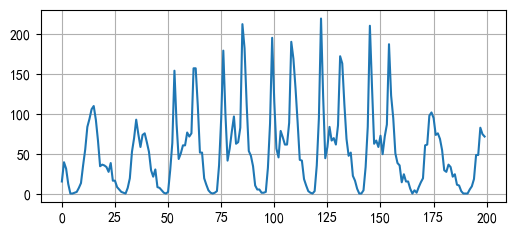

In [61]:
plt.plot(data_train['count'][:200])
plt.grid()
'''存在一定的周期性， 24小时一个周期'''

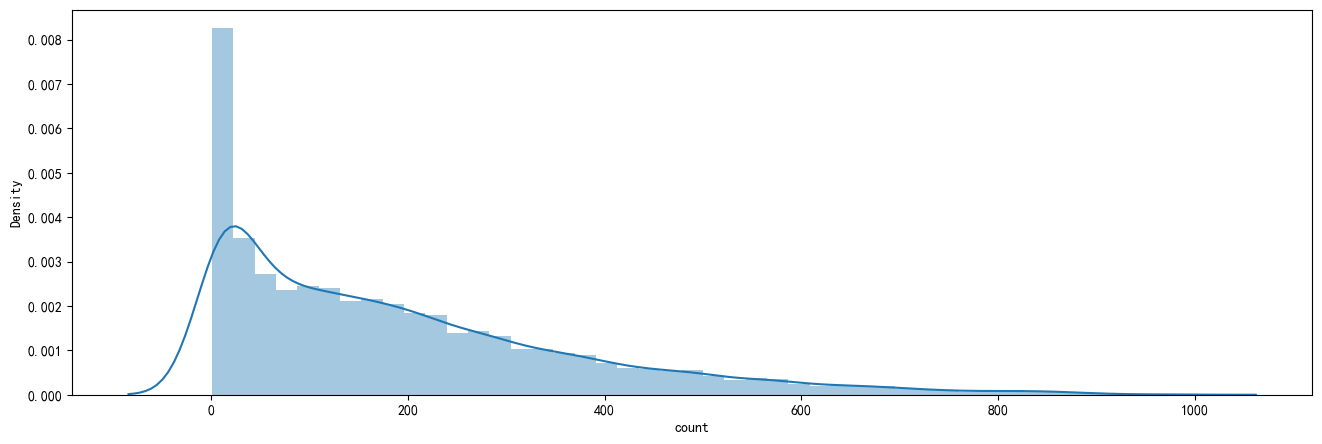

In [19]:
#通过seaborn库中的distplot()函数查看数据的整体分布
plt.figure(figsize = (16,5))
sns.distplot(data_train['count'])
plt.show()

直方图表示了每个数值范围的数据出现的频率，而核密度估计则是对数据分布进行的平滑估计线。从图中可以看出，租用共享单车的次数大部分都在0-400之间，其中0-300这个阶段的占比更大。说明了统计的这些人当中，大部分人租车次数都是在0-300次左右。

### 年份维度

In [20]:
#样本数据中横跨了两个年份 2011和2012，统计每个年份的整体需求
data_year = data_train[['year','count']].groupby('year').agg('sum')

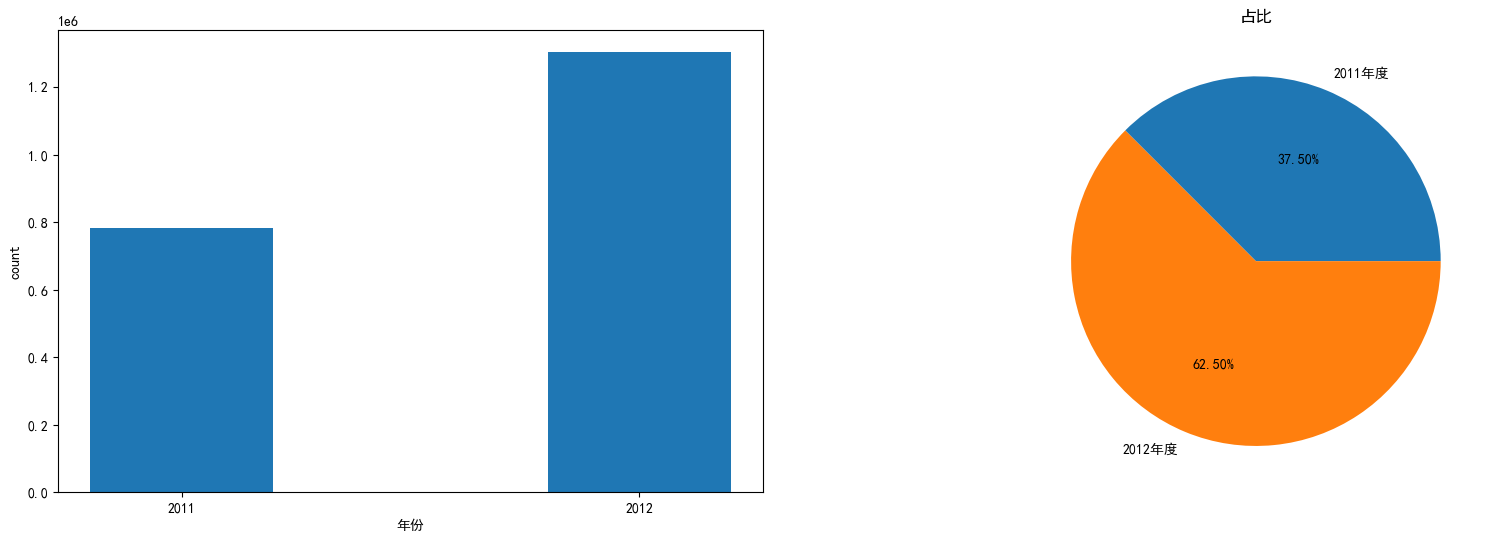

In [21]:
#绘制图像
fig,[ax1,ax2]  =  plt.subplots(1,2,figsize = (20,6))
ax1.bar(data_year.index,data_year['count'],width = 0.4)
ax1.set_xticks([2011,2012])
ax1.set_xlabel('年份')
ax1.set_ylabel('count')

labels = ['2011年度','2012年度']
ax2.pie(data_year['count'],labels = labels,autopct = '%1.2f%%')
ax2.set_title('占比')
plt.show()

在这些数据当中，统计的主要是2011和2012两个年度的数据，所以我们按年份来分组统计每年的租车总数。从图中展示的结果来看，2012年度的租用总数占比较大。据实际情况分析，2011-2012年正处在信息和科技高速发展的阶段，每年甚至是每个月都会有较大的变化，而且现在人们的环保意识在不断提升，在短距离出行时人们更愿意选择骑共享单车，所以租用共享单车的人数增多是必然的现象，相信未来每年的租用总人数还是会不断上升。

### 月份维度

In [23]:
#按年统计每月租车需求 2011、2012
data_month_2011 = data_train[data_train['year'] ==  2011][['month','count']].groupby('month').agg('sum')
data_month_2012 = data_train[data_train['year'] == 2012][['month','count']].groupby('month').agg('sum')

In [24]:
print(data_month_2011)

       count
month       
1      23552
2      32844
3      38735
4      50517
5      79713
6      89776
7      92848
8      83296
9      79104
10     79522
11     70889
12     61183


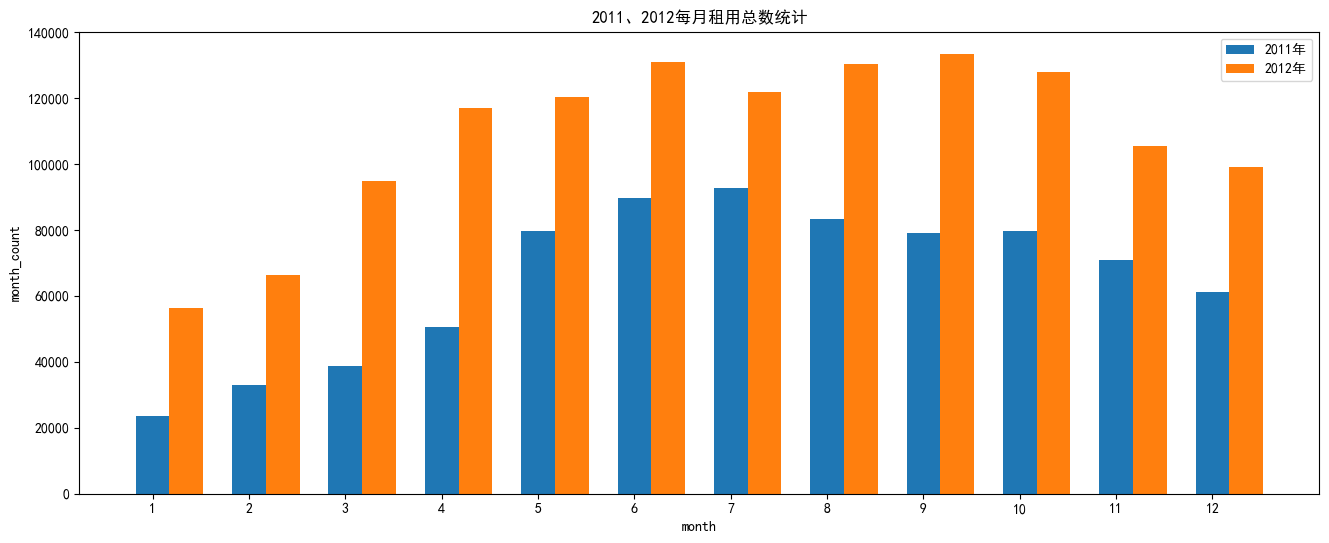

In [25]:
#绘图
plt.figure(figsize = (16,6))
bar_width  =  0.35
# 绘制第一组柱状图
plt.bar(data_month_2011.index,data_month_2011['count'], width = bar_width, label = '2011年')

# 绘制第二组柱状图
plt.bar(data_month_2012.index+bar_width ,data_month_2012['count'], width = bar_width, label = '2012年')
plt.xticks([i for i in range(1,13)])
plt.title("2011、2012每月租用总数统计")
plt.xlabel("month")
plt.ylabel("month_count")
plt.legend() #显示图例
plt.show()

从图中可以看出2011年和2012年两年的租车高峰都是集中在3月-12月之间，1月-3月这个时段租用人数相对较少，可能是1月-3月是春节假期，上班族回家过节，租户减少了，也可能是因为1-3月气温比较低，人们不愿易骑车出行。总的来说，每个月的租用总数都是不同的，它们之间存在着一定的影响关系。

### 小时维度 

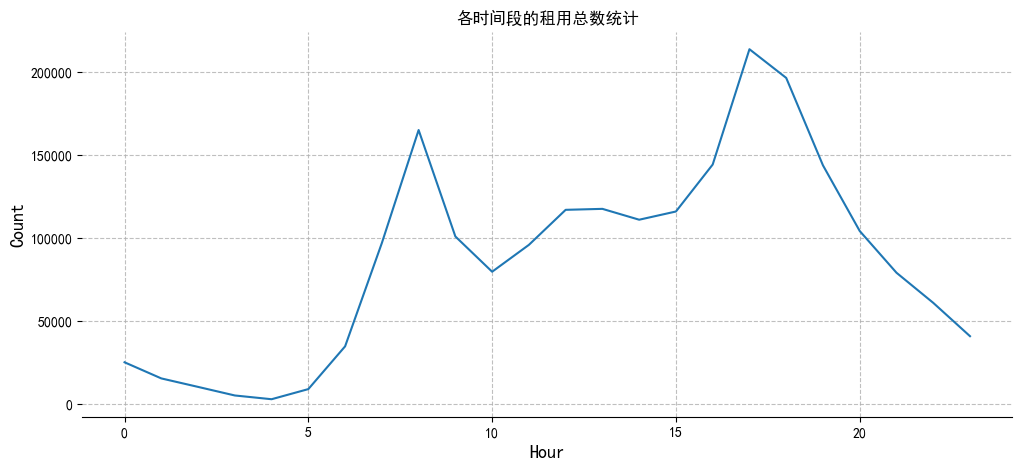

In [26]:
#根据时间段分组将一天当中各个时间段的租用总人数统计出来
data_hour = data_train[['hour','count']].groupby('hour').agg('sum')
plt.figure(figsize = (12,5))
x = data_hour.index
y = data_hour['count']
plt.plot(x,y)
plt.grid(linestyle = '--',alpha = 0.8) #显示背景为线框，透明度为0.8
plt.xlabel('Hour',fontsize = 13)
plt.ylabel('Count',fontsize = 13)
plt.title('各时间段的租用总数统计')
sns.despine(left = True)  #不显示左边边框线

上图主要统计了样本中一天各时间段的租用总数，从图中可以看出，数据在早上8点和下午6点出现了峰值，这个可能是因为这个时间段处在上下班的高峰期，租车人数比较多。所以不同的时间段，租车人数有着一定的差异。

### 季节维度

In [27]:
#根据季节分组统计租车总人数
data_season = data_train[['season','count']].groupby('season').agg('sum')
#1代表春季、2代表夏季、3代表秋季、4代表冬季
data_season

,count
season,
1,312498
2,588282
3,640662
4,544034


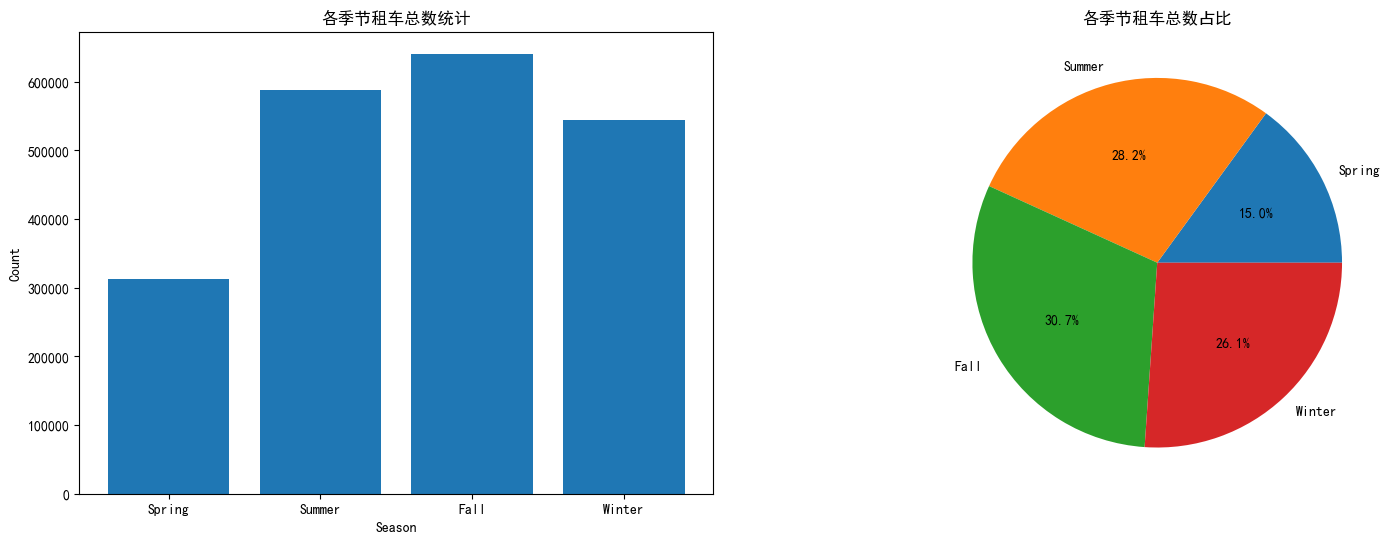

In [28]:
#绘图
fig,[ax0,ax1]  =  plt.subplots(1,2,figsize = (18,6))
seasons = ['Spring','Summer','Fall','Winter']
ax0.bar(seasons,data_season['count'])
ax0.set_xlabel('Season')
ax0.set_ylabel('Count')
ax0.set_title('各季节租车总数统计')

ax1.pie(data_season['count'],labels = seasons,autopct = '%1.1f%%')
ax1.set_title('各季节租车总数占比')
plt.show()

从图中可以看出不同季节的租车需求大小排序 三季度>二季度>四季度>一季度，一季度租车需求最低，而且是远低于二季度、三季度和四季度，二季度、三季度和四季度三者差别略小。不同季节对租车总数存在一定的影响。

### 工作日和非工作日各时间段维度

In [29]:
data_workingday = data_train[data_train['workingday'] == 1][['hour','count']].groupby('hour').agg('sum')  #工作日
data_noworkingday = data_train[data_train['workingday'] == 0][['hour','count']].groupby('hour').agg('sum')#非工作日

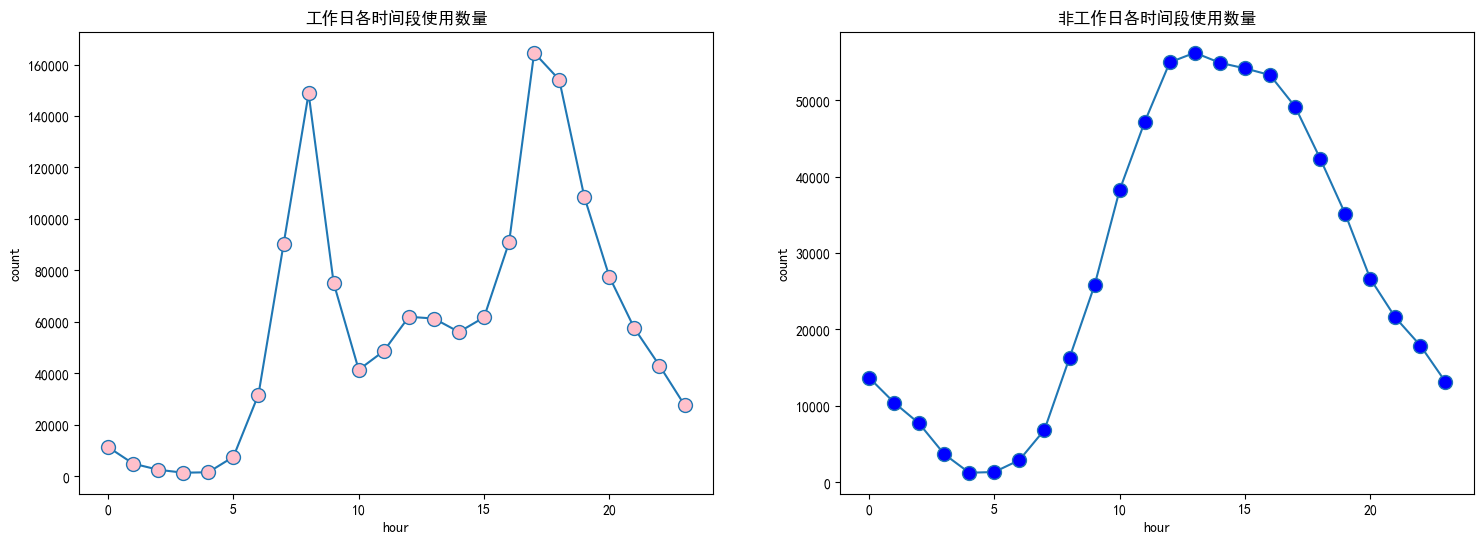

In [30]:
#绘制图像
fig,[ax0,ax1]  =  plt.subplots(1,2,figsize = (18,6))

ax0.plot(data_workingday.index,data_workingday['count'],marker = 'o',markersize = 10,markerfacecolor = 'pink')
ax0.set_title('工作日各时间段使用数量')
ax0.set_xlabel('hour')
ax0.set_ylabel('count')
ax1.plot(data_noworkingday.index,data_noworkingday['count'],marker = 'o',markersize = 10,markerfacecolor = 'blue')
ax1.set_title('非工作日各时间段使用数量')
ax1.set_xlabel('hour')
ax1.set_ylabel('count')

plt.show()

在工作日，用车的高峰期还是集中在早上8点和下午6点，但是在非工作日，用车高峰期发生了一定的变化，早上8点可能是在休息，在中午的时候才出现用车高峰。工作日和非工作日对于用车高峰还是存在一定的影响。

### 节假日维度

In [63]:
data_holiday = data_train[['holiday','count']].groupby('holiday').agg('mean')

In [64]:
data_holiday

,count
holiday,
0,191.741655
1,185.877814


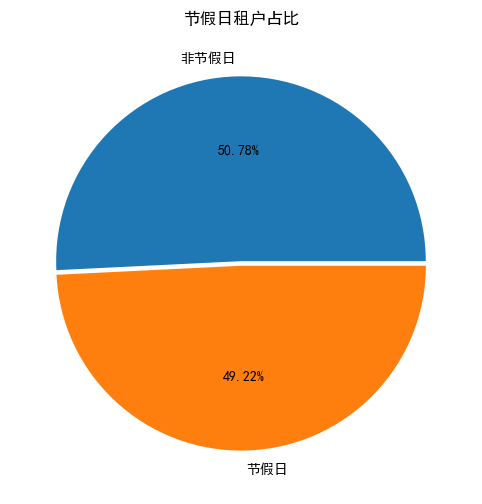

In [65]:
#绘图
holiday = ['非节假日','节假日']
plt.figure(figsize = (16,6))
plt.pie(data_holiday['count'],labels = holiday,autopct = '%1.2f%%',explode = [0.01,0.015])
plt.title('节假日租户占比')
plt.show()

从图中可以很明显的看出非节假日的租车需求大于节假日的租车需求。节假日人们可能会选择在家休息或者开车出去旅游，租用自行车的概率很小。

### 天气维度 

In [34]:
#提取相应特征数据
data_weather = data_train[['weather','count']].groupby('weather').agg('sum')

weather = ['晴朗天气','薄雾天气','小雪天气','小雪+薄雾天气']  #数据标签

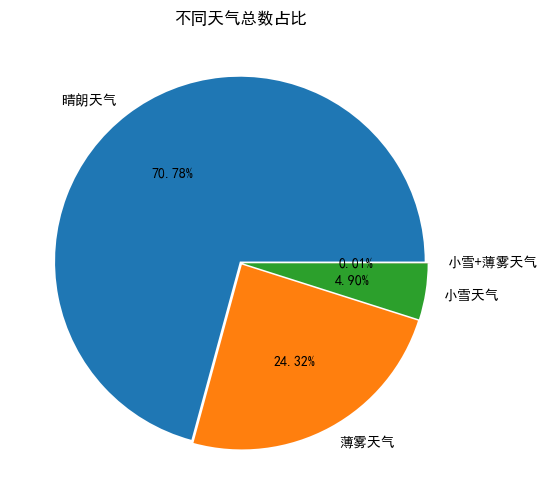

In [35]:
#绘图
plt.figure(figsize = (16,6))
plt.pie(data_weather['count'],labels = weather,autopct = '%1.2f%%',explode = [0.01,0.01,0.01,0.02])
plt.title('不同天气总数占比')
plt.show()

从上面的占比图可以看出，天气对于租车总数存在较大的影响。在晴朗的天气租车人数非常多，但是在小雪和薄雾天，几乎没有人会选择骑车出行。

### 温度、大气温度、湿度、风速 

In [36]:
data_temp = data_train[['temp','count']].groupby('temp').agg('sum')     #根据温度分组统计总数
data_atemp = data_train[['atemp','count']].groupby('atemp').agg('sum')  #根据大气温度分组统计
data_humidity = data_train[['humidity','count']].groupby('humidity').agg('sum')#根据湿度统计
data_windspeed = data_train[['windspeed','count']].groupby('windspeed').agg('sum')#根据风速分组统计
data_windspeed.reset_index(inplace = True)

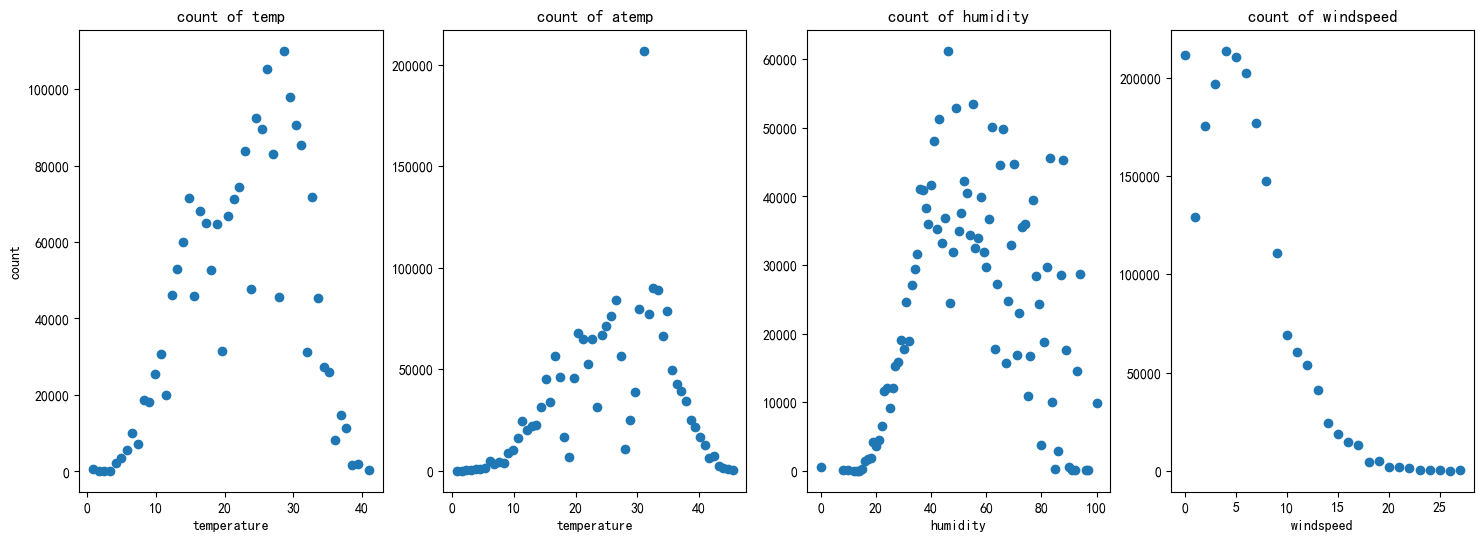

In [37]:
#绘图
fig,[ax0,ax1,ax2,ax3]  =  plt.subplots(1,4,figsize = (18,6))

ax0.scatter(data_temp.index,data_temp['count'])  #子图1，温度
ax0.set_xlabel('temperature') #x轴标签
ax0.set_ylabel('count')       #y轴标签
ax0.set_title('count of temp' ) #标题

ax1.scatter(data_atemp.index,data_atemp['count']) #子图2，大气温度
ax1.set_xlabel('temperature')
ax1.set_title('count of atemp')

ax2.scatter(data_humidity.index,data_humidity['count']) #子图3，湿度
ax2.set_xlabel('humidity')
ax2.set_title('count of humidity')

ax3.scatter(data_windspeed.index,data_windspeed['count']) #子图4，风速
ax3.set_xlabel('windspeed')
ax3.set_title('count of windspeed')
plt.show()

从上图可以观察到温度与租车需求的强相关性，在温度小于32℃时，随着温度的增加，租车需求总体呈现线性大幅增加，在温度在32~33°C时达到最大，在温度大于33℃时，租车需求随着温度的进一步增加而下降。
体感温度和租车需求基本上也符合上述规律。
对于风速，它对租车总数的影响不是很大。

## 特征工程

### 相关性分析

In [38]:
#剔除datetime、casual、registered等字段
data_train1 = data_train[['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'count','year', 'month', 'day', 'hour', 'minute']]

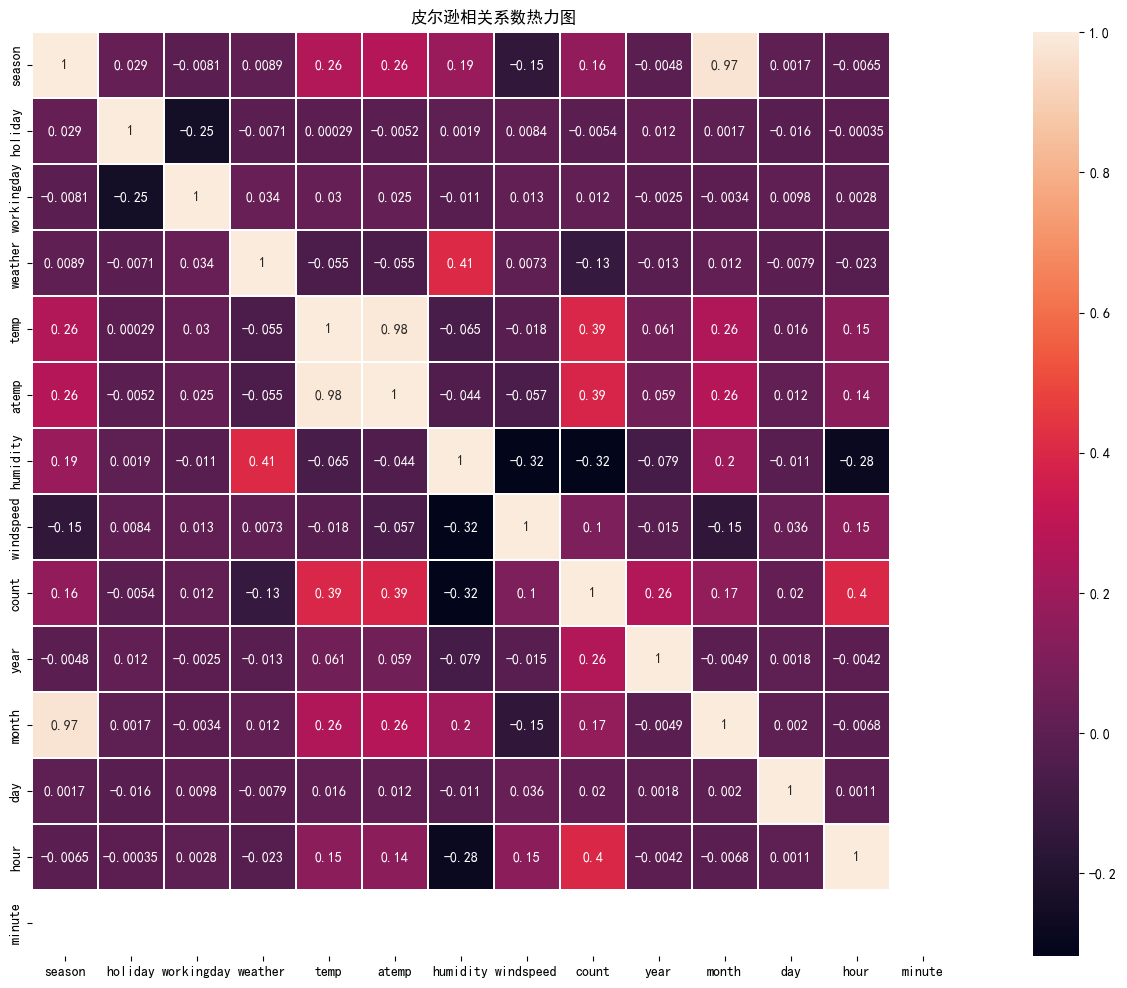

In [39]:
# 计算皮尔逊相关系数
correlation_matrix  =  data_train1.corr(method = 'pearson')

# 绘制热力图
plt.figure(figsize = (20,12))
sns.heatmap(correlation_matrix, linewidths = 0.1,vmax = 1.0, square = True, linecolor = 'white', annot = True)
plt.title('皮尔逊相关系数热力图')
plt.show()

从相关性热力图中可以看出某些字段之间的相关性较高，比如season和month的相关性高达0.97，temp和atemp的相关性高达0.98，二者对于count的影响几乎可以用两者之一表示就可以。对于我们的目标数据count，相关性较高的是hour、temp、atemp，这些对于count的值影响比较大。

### 特征选取

In [40]:
#选择符合的特征
features = [ 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed','year', 'month', 'day', 'hour', 'minute']

In [41]:
#删除部分特征
features1 = [ 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed','year', 'month', 'day', 'hour', 'minute']

## 模型构建 

In [42]:
from sklearn.metrics import mean_squared_error          #均方误差
from sklearn.metrics import mean_absolute_error         #平均绝对误差      
from sklearn.metrics import r2_score                    #R方
from sklearn.model_selection import train_test_split    #拆分训练集和测试集
from sklearn.ensemble import GradientBoostingRegressor  #梯度提升回归模型
from sklearn.ensemble import RandomForestRegressor      #随机森林模型
from sklearn.svm import SVC                             #支持向量机模型
from sklearn.tree import DecisionTreeRegressor          #决策树模型
from sklearn.linear_model import Ridge                  #岭回归模型
from sklearn.linear_model import Lasso                  #Lasso回归模型

In [43]:
#训练集和测试集拆分
X  =  data_train[features]            # 样本特征
y  = data_train['count']              # 样本的目标值
X_train, X_test, y_train, y_test  =  train_test_split(X, y, test_size = 0.2)   # 数据集拆分

In [44]:
#剔除部分特征后划分训练集和测试集
X1 = data_train[features1]
y = data_train['count']
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size = 0.2)

### 梯度提升回归 

In [45]:
gbr = GradientBoostingRegressor()          #定义模型
gbr.fit(X1_train, y_train)                # 模型训练
pre  =  gbr.predict(X1_test)                # 模型预测
print("R方值:",r2_score(y_test,pre))
print("均方误差:",mean_squared_error(y_test,pre))
print("均方根误差:",np.sqrt(mean_squared_error(y_test,pre)))
print("平均绝对误差:",mean_absolute_error(y_test,pre))

R方值: 0.8759758241101948
均方误差: 3997.5512948978676
均方根误差: 63.22619152612205
平均绝对误差: 42.377464674036574


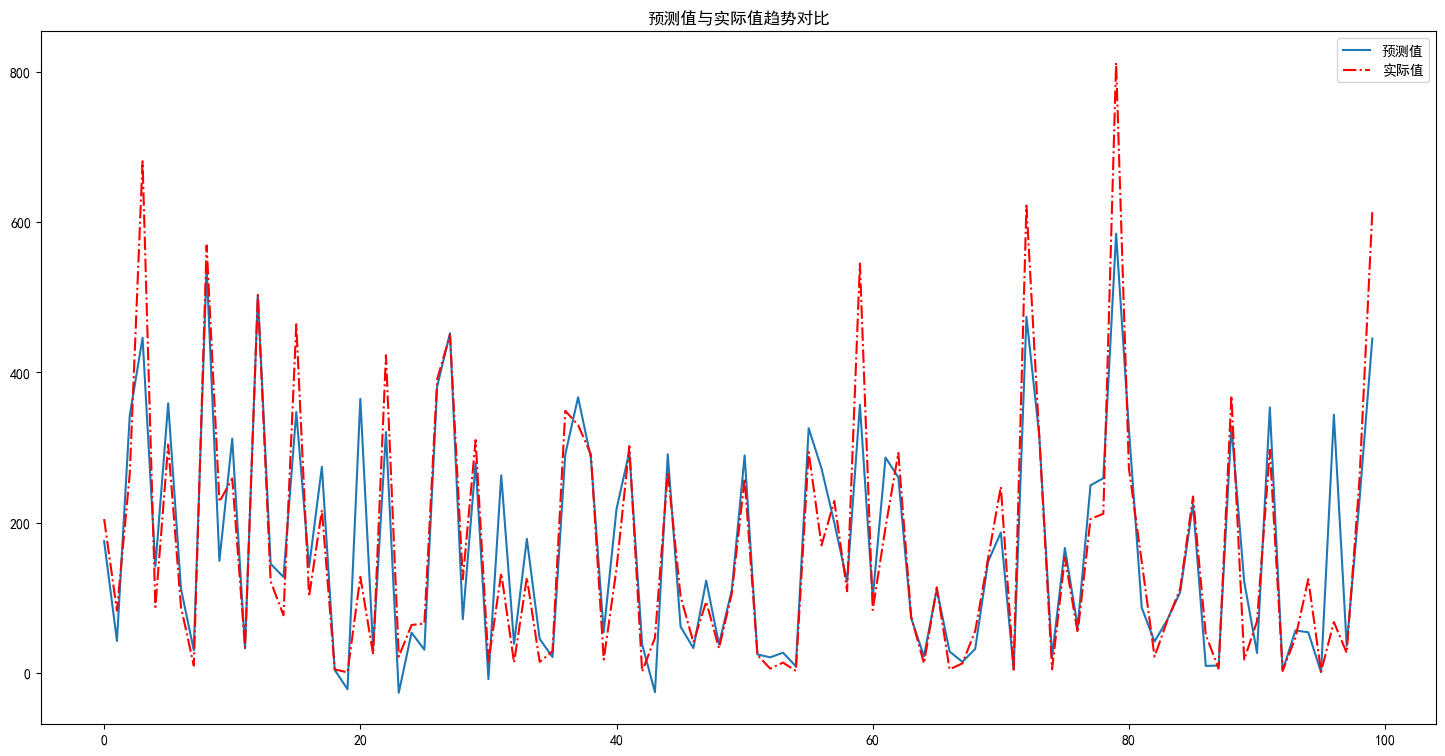

In [46]:
plt.figure(figsize = (18,9))
plt.plot(range(0,100),pre[0:100],label = '预测值')           #模型预测值
plt.plot(range(0,100),y_test[0:100],'r-.',label = '实际值')  #样本实际值
plt.title('预测值与实际值趋势对比')
plt.legend()
plt.show()

通过截取其中的一部分预测数据和样本数据通过折线图展示发现，预测数据和样本实际数据它们的增长趋势大致相同，这能够看出梯度提升回归模型的预测准确率是比较高的，也就是说模型效果好。

### 随机森林

In [47]:
rfr = RandomForestRegressor() #调用随机森林模型
rfr.fit(X1_train,y_train)  #模型训练
pre1 = rfr.predict(X1_test)  #模型预测
print("R方值:",r2_score(y_test,pre1))
print("均方误差:",mean_squared_error(y_test,pre1))
print("均方根误差:",np.sqrt(mean_squared_error(y_test,pre1)))
print("平均绝对误差:",mean_absolute_error(y_test,pre1))

R方值: 0.9413343189902563
均方误差: 1890.9141496326906
均方根误差: 43.4846426871912
平均绝对误差: 26.158076216712576


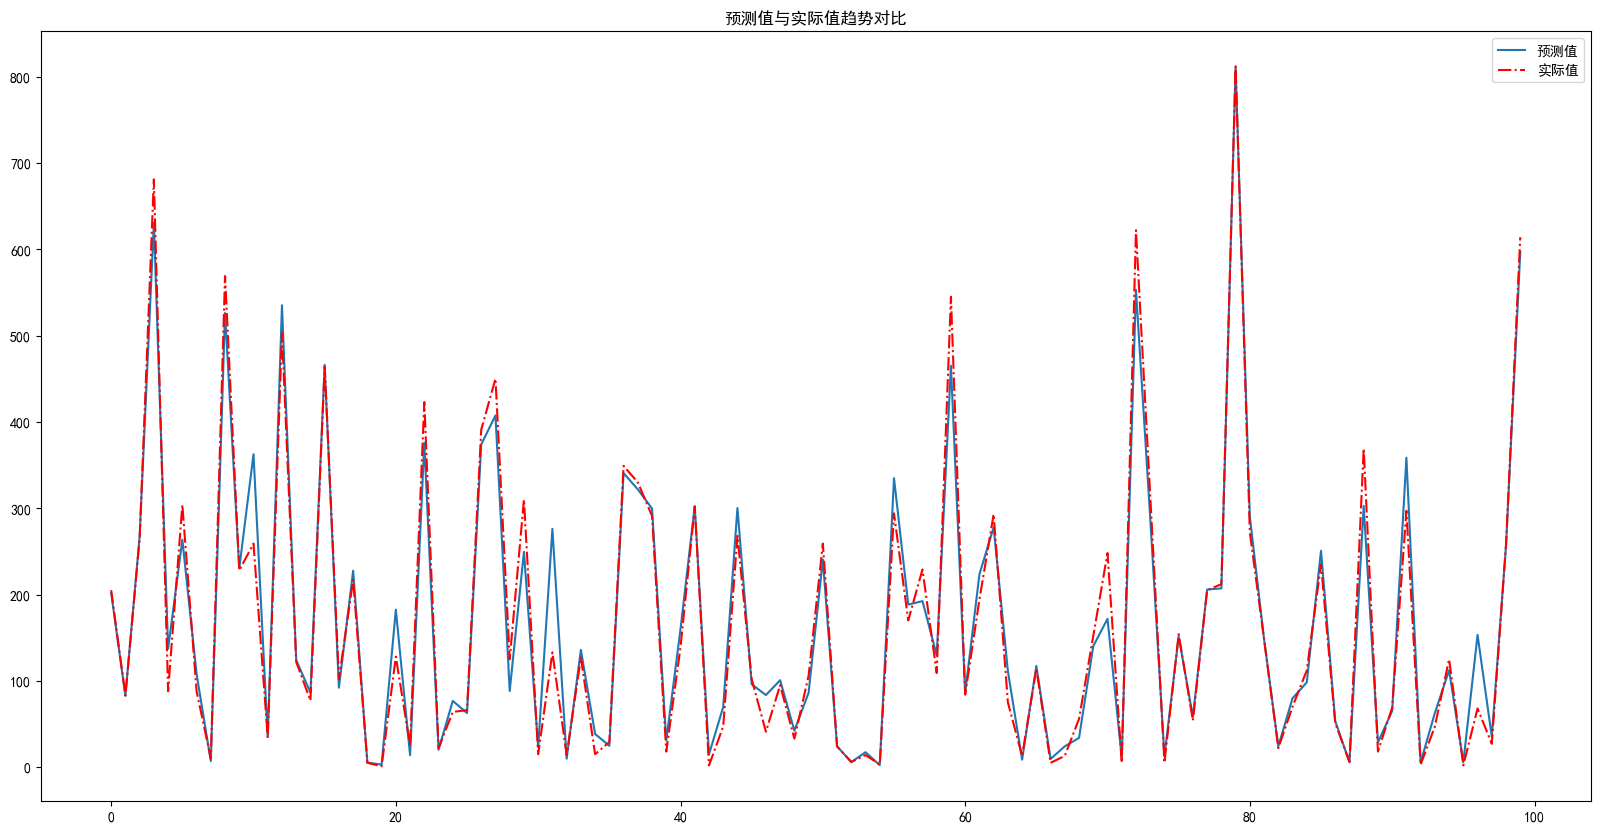

In [48]:
plt.figure(figsize = (20,10))
plt.plot(range(0,100),pre1[0:100],label = '预测值')          #模型预测值
plt.plot(range(0,100),y_test[0:100],'r-.',label = '实际值')  #样本实际值
plt.title('预测值与实际值趋势对比')
plt.legend()
plt.show()

从图中我们可以观察到，预测的需求趋势和实际的需求趋势基本上是相同的，这说明了该模型的预测效果较好。

In [49]:
#未剔除部分指标前的效果
rfr1 = RandomForestRegressor() #调用随机森林模型
rfr1.fit(X_train,y_train)  #模型训练
pre_1 = rfr1.predict(X_test)  #模型预测
print("R方值:",r2_score(y_test,pre_1))
print("均方误差:",mean_squared_error(y_test,pre_1))
print("均方根误差:",np.sqrt(mean_squared_error(y_test,pre_1)))
print("平均绝对误差:",mean_absolute_error(y_test,pre_1))

R方值: -0.09956189107106805
均方误差: 35441.11484664831
均方根误差: 188.25810698784875
平均绝对误差: 150.35715335169883


### 支持向量机（SVM）

In [ ]:
svm = SVC( kernel = 'linear')
svm.fit(X_train,y_train)   #模型训练
pre2 = svm.predict(X_test)   #模型预测
print("R方值:",r2_score(y_test,pre2))
print("均方误差:",mean_squared_error(y_test,pre2))
print("均方根误差:",np.sqrt(mean_squared_error(y_test,pre2)))
print("平均绝对误差:",mean_absolute_error(y_test,pre2))

### 决策树

In [50]:
dtr = DecisionTreeRegressor()
dtr.fit(X1_train,y_train)       #模型训练
pre3 = dtr.predict(X1_test)       #模型预测
print("R方值:",r2_score(y_test,pre3))
print("均方误差:",mean_squared_error(y_test,pre3))
print("均方根误差:",np.sqrt(mean_squared_error(y_test,pre3)))
print("平均绝对误差:",mean_absolute_error(y_test,pre3))

R方值: 0.8931827926850255
均方误差: 3442.935720844812
均方根误差: 58.676534669702605
平均绝对误差: 35.313131313131315


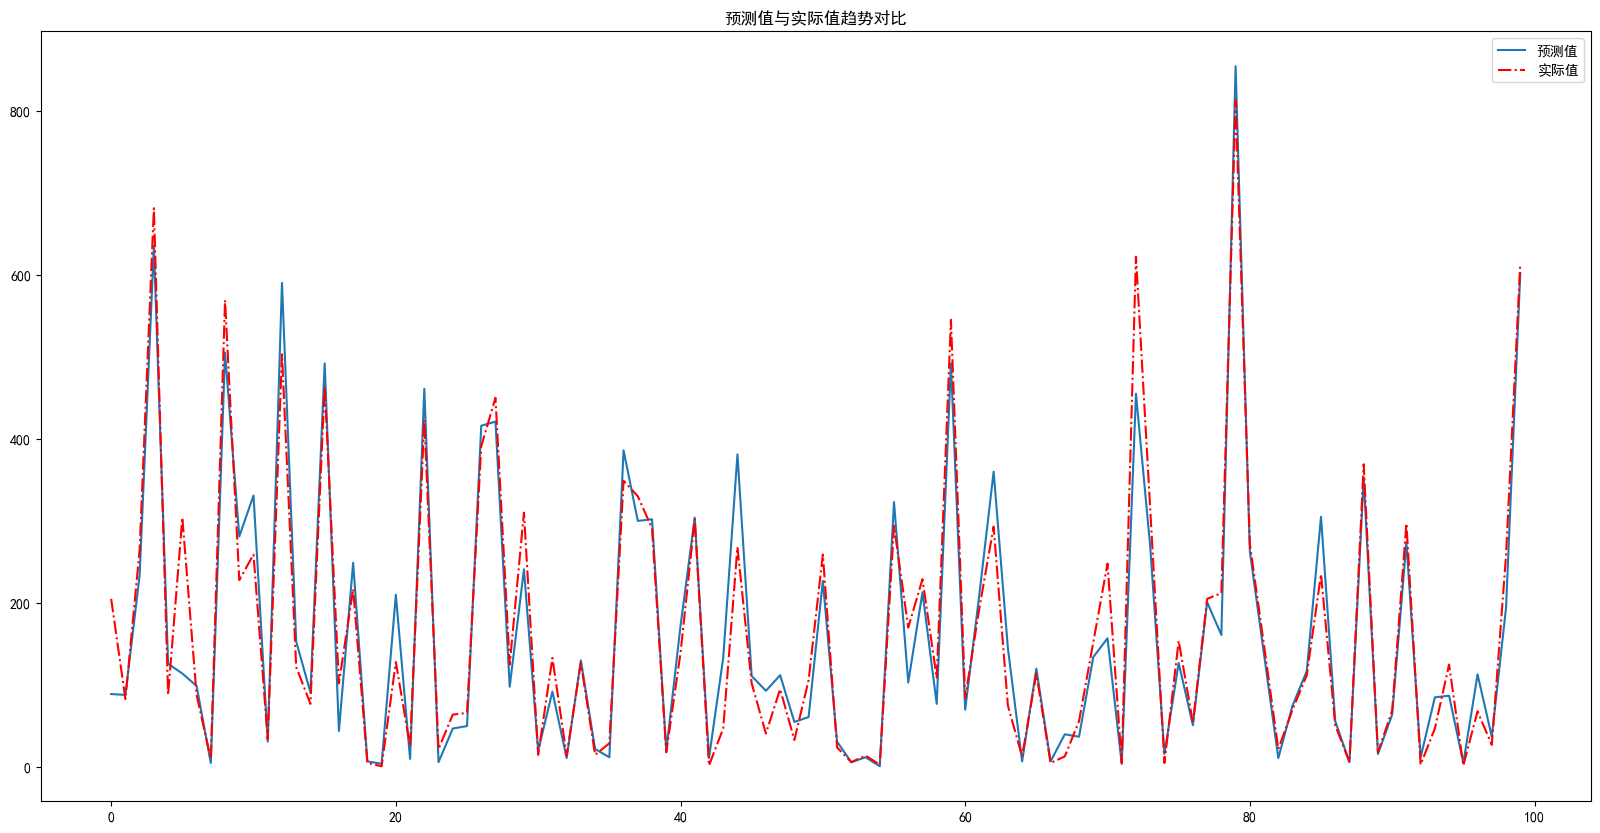

In [51]:
plt.figure(figsize = (20,10))
plt.plot(range(0,100),pre3[0:100],label = '预测值')          #模型预测值
plt.plot(range(0,100),y_test[0:100],'r-.',label = '实际值')  #样本实际值
plt.title('预测值与实际值趋势对比')
plt.legend()
plt.show()

### Lasso回归

In [52]:
la = DecisionTreeRegressor()    #定义Lasso模型
la.fit(X1_train,y_train)       #模型训练
pre4 = la.predict(X1_test)       #模型预测
print("R方值:",r2_score(y_test,pre4))
print("均方误差:",mean_squared_error(y_test,pre4))
print("均方根误差:",np.sqrt(mean_squared_error(y_test,pre4)))
print("平均绝对误差:",mean_absolute_error(y_test,pre4))

R方值: 0.8886401033833176
均方误差: 3589.3558310376493
均方根误差: 59.91123292870586
平均绝对误差: 35.8287419651056


### 岭回归

In [53]:
rd = Ridge()
rd.fit(X1_train,y_train)     #模型训练
pre5 = rd.predict(X1_test)     #模型预测
print("R方值:",r2_score(y_test,pre5))
print("均方误差:",mean_squared_error(y_test,pre5))
print("均方根误差:",np.sqrt(mean_squared_error(y_test,pre5)))
print("平均绝对误差:",mean_absolute_error(y_test,pre5))

R方值: 0.3852357576444423
均方误差: 19815.101172443083
均方根误差: 140.76612224694932
平均绝对误差: 105.45762799355856


## 预测数据

通过对比模型效果后我们发现，随机森林模型的效果是最佳的，所有我们选择该模型来预测我们的未来需求。

In [54]:
#预测前的数据
data_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute
0,2012-12-20 00:00:00,4,0,1,1,13.12,16.665,61,8.9981,2012,12,20,0,0
1,2012-12-20 01:00:00,4,0,1,1,13.12,17.425,66,0.0000,2012,12,20,1,0
2,2012-12-20 02:00:00,4,0,1,1,13.12,17.425,66,0.0000,2012,12,20,2,0
3,2012-12-20 03:00:00,4,0,1,2,12.30,15.910,70,6.0032,2012,12,20,3,0
4,2012-12-20 04:00:00,4,0,1,2,12.30,15.910,70,6.0032,2012,12,20,4,0


In [55]:
X2_test = data_test[features1] #测试数据微处理
pred = rfr.predict(X2_test).astype(np.int)  #预测数据并转换为整型
pred = pd.DataFrame(pred) #转换为数据框
pred.columns = ['count']  #数据框列命名
# 按照索引合并两个数据框，并将数据填充到指定列中
data_test1 =  data_test.merge(pred, how = 'left', left_index = True, right_index = True)

In [59]:
#查看预测后数据
data_test1.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,count
281,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,354
282,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,242
283,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,185
284,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,137
285,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,2012,12,31,23,0,83


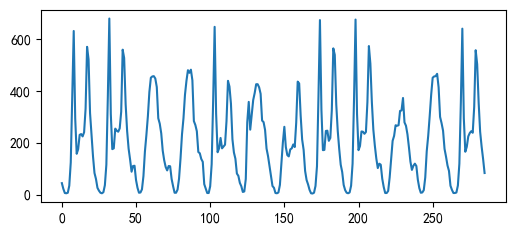

In [57]:
plt.plot(pred) # 预测的结果

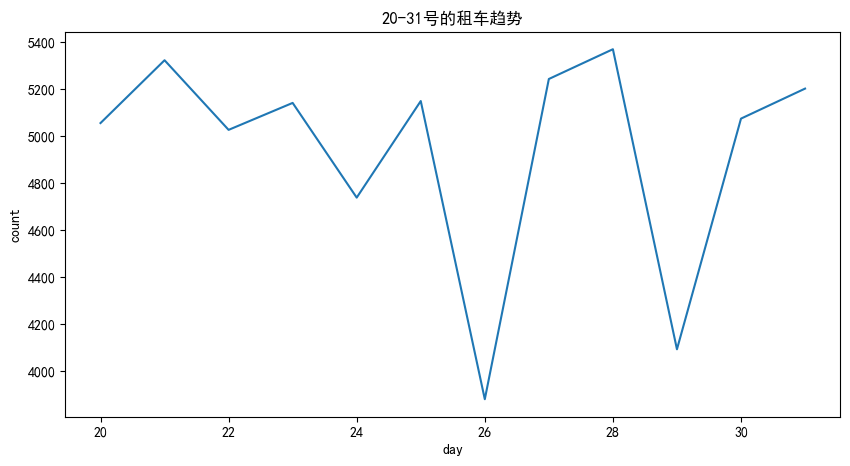

In [58]:
#按不同的日期来分组统计总数
data_day = data_test1[['day','count']].groupby('day').agg('sum')
x = data_day.index
y = data_day['count']
plt.figure(figsize = (10,5))
plt.plot(x,y)
plt.xlabel('day')
plt.ylabel('count')
plt.title('20-31号的租车趋势')
plt.show()

我们具体统计20号至31号的租车总人数情况，通过折线图观察其趋势发现，在20号到31号这些天中用户的需求普遍较高，但是在26、29两天出现了极端值，需求数相对较低，原因可能是这两天是极端天气影响用户使用，也可能是节假日，用户选择的出行方式为其他。